# Explore here

In [1]:
# Your code here
import pandas as pd
import math

#Paso 1: Planteamiento del problema y recopilación de datos
airbnb_ny = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
airbnb_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
#Paso 2: Exploración y limpieza de datos

airbnb_ny.shape #Existen 48895 lineas (observaciones) y 16 columnas (variables)
airbnb_ny.info() #las variables last_review y reviews_per_month tienen 10.000 observaciones menos que el resto de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
#Número de observaciones por cada variable de posible duplicidad
print(f"El número de datos repetidos por el id es de: {airbnb_ny['id'].duplicated().sum()}")
print(f"El número de datos repetidos por el name es de: {airbnb_ny['name'].duplicated().sum()}")
print(f"El número de datos repetidos por el host_id es de: {airbnb_ny['host_id'].duplicated().sum()}")

#No hay datos duplicados para id. Eso quiere decir que cada observación es única
#Por lo tanto eso explica la duplicidad de las otras variables, name y host_id
#En el caso de name eso se puede deber a que algun airbnb coincida en el nombre ya sea porque es más genérico, o por cualquier otro motivo
#Por el lado del host_id, esta duplicidad probablemente se deba a que haya hosts con más de un airbnb

El número de datos repetidos por el id es de: 0
El número de datos repetidos por el name es de: 989
El número de datos repetidos por el host_id es de: 11438


In [4]:
#Excluir información irrelevante

airbnb_ny.drop(["id", "name", "host_name", "last_review", "reviews_per_month"],axis=1, inplace=True)
#Elimino las siguientes columnas por los siguientes motivos:
#El nombre del airbnb es irrelevante ya que no nos vamos a centrar en uno en espcífico pero si en otros estimadores cuantitativos
#El id no es necesario ya que es como tal un número aleatorio
#Las reseñas tampoco son relevantes ya que no dicen nada del piso. Simplemente sabemos el numero y la fecha de la ultima reseña
#El nombre del host tampoco es muy relevante ya que no nos vamos a centrar en ningun dueño/a en concreto
airbnb_ny.head()
airbnb_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


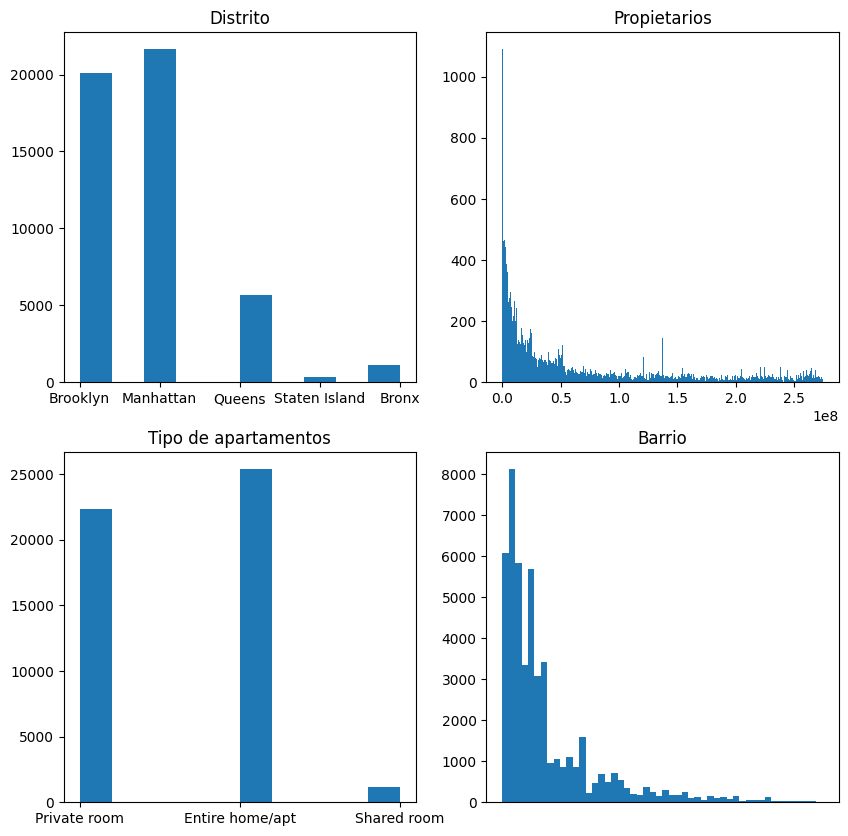

In [5]:
import matplotlib.pyplot as plt
#Paso 3: Análisis de variables univariante


#Análisis sobre variables categóricas:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

#Distrito
axs[0,0].hist(airbnb_ny["neighbourhood_group"])
axs[0,0].set_title("Distrito")

#Propietarios
axs[0,1].hist(airbnb_ny["host_id"], bins=1000)
axs[0,1].set_title("Propietarios")

#Tipos de apartamentos
axs[1,0].hist(airbnb_ny["room_type"])
axs[1,0].set_title("Tipo de apartamentos")

#Barrio
axs[1,1].hist(airbnb_ny["neighbourhood"], bins=50)
axs[1,1].set_title("Barrio")
axs[1,1].tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)

#Vemos que el orden de distritos, de mayor a menor, con mayor número de airbnb es:
    #Manhattan, Brooklyn, Queens, Bronx y Staten Island
#Con respecto a los apartamentos, hay más apartamentos completos que habitaciones privadas e incluso compartidas
#Hay muy pocos propietarios con muchos airbnb. Están muy concentrados. Y pasa igual pasa con los barrios, en pocos barrios hay muchos airbnb


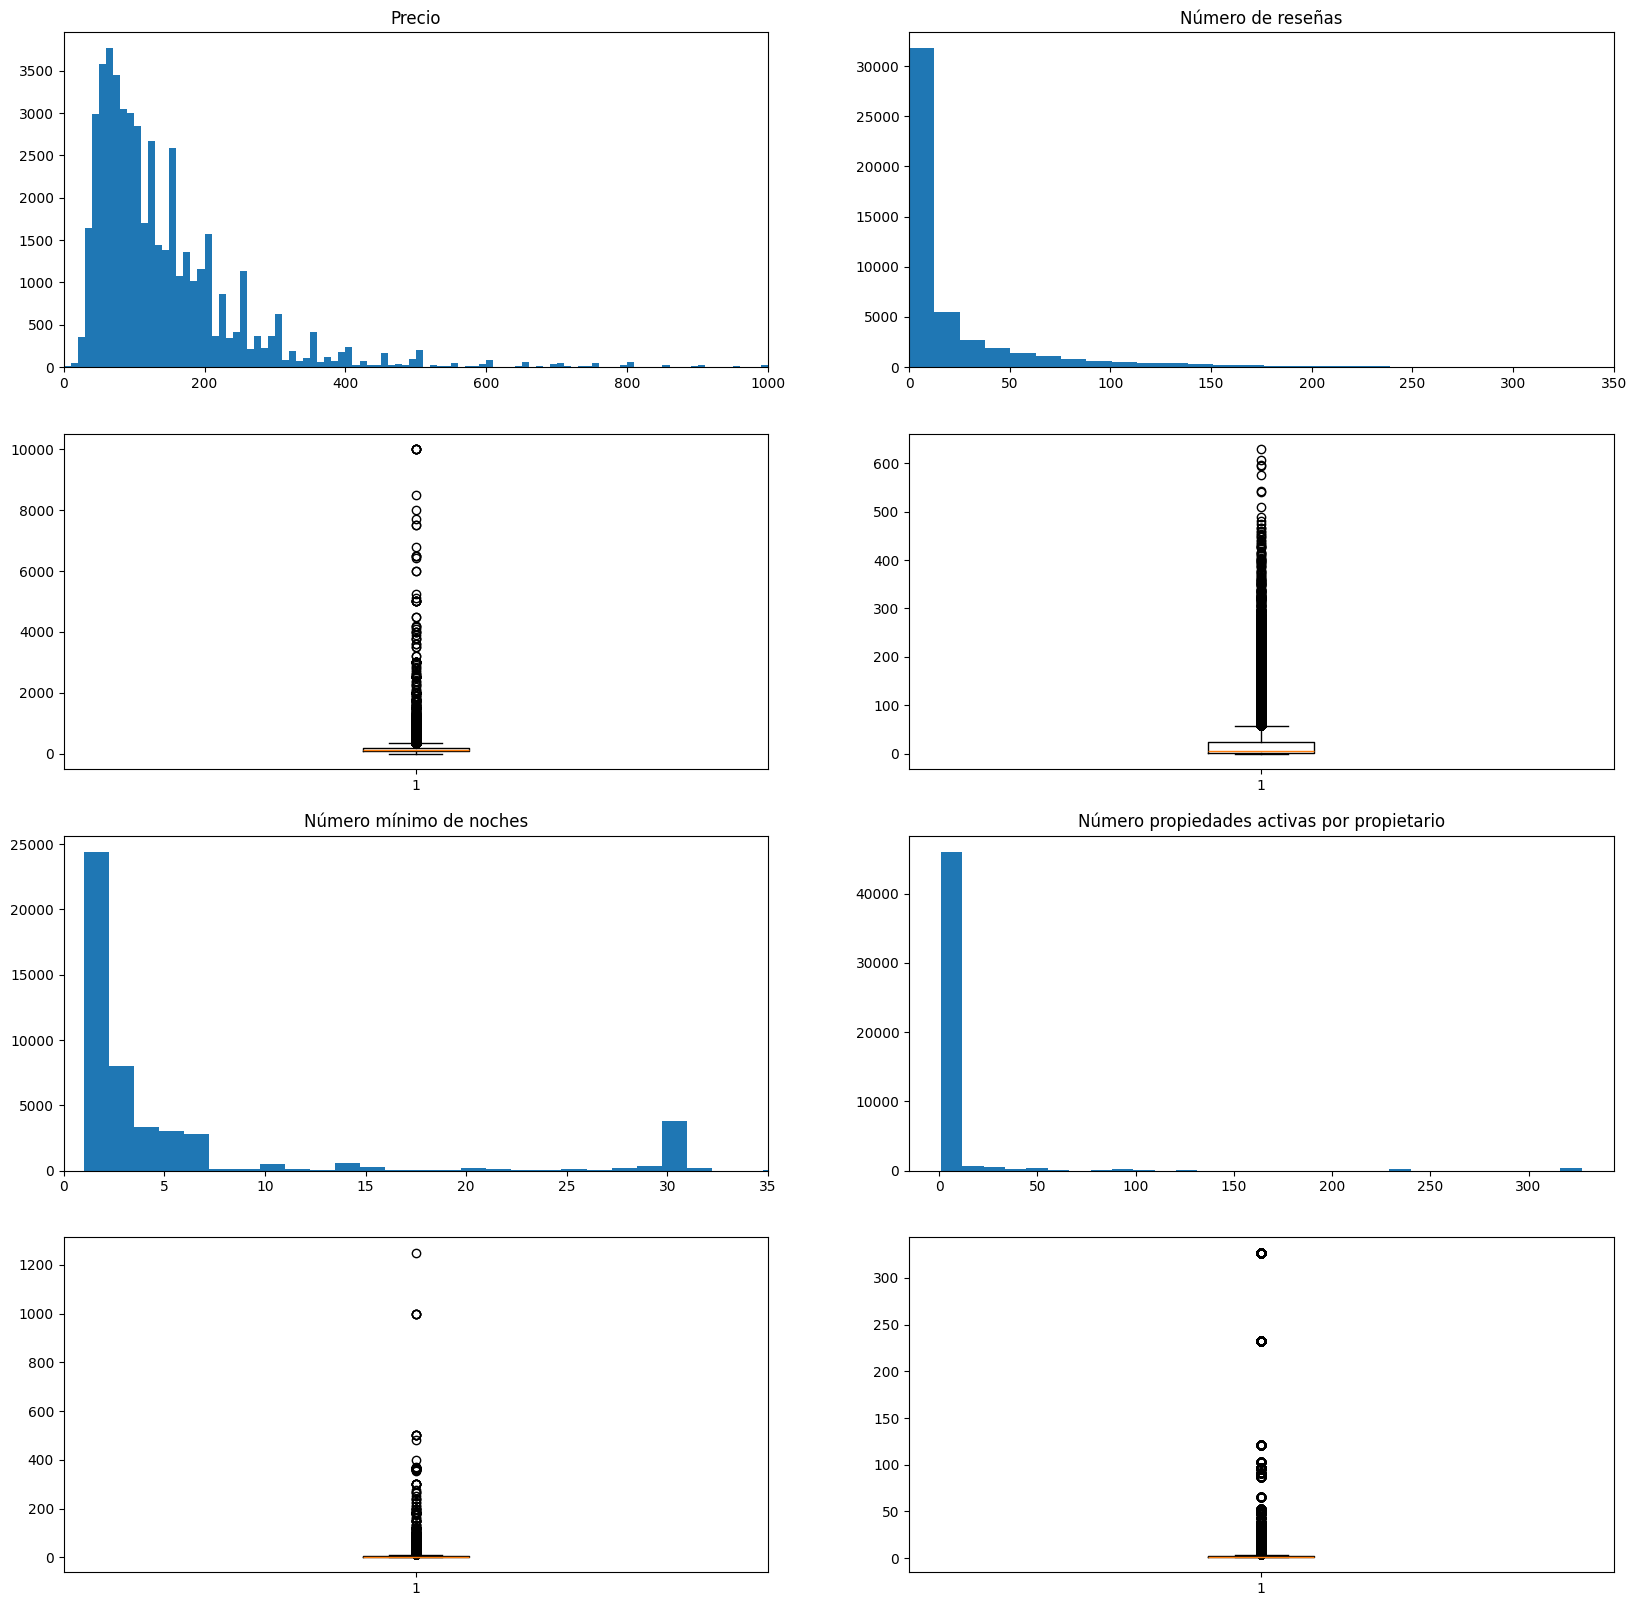

In [6]:
#Análisis sobre variables numéricas
fig, axs = plt.subplots(4, 2, figsize=(20,20))

#Precio
axs[0,0].hist(airbnb_ny["price"], bins = 1000)
axs[0,0].set_title("Precio")
axs[0,0].set_xlim(0, 1000) #limito el número máximo de valores del eje x a 1000 ya que es el precio máximo de los airbnb del dataset

axs[1,0].boxplot(airbnb_ny["price"])

#Número de reseñas
axs[0,1].hist(airbnb_ny["number_of_reviews"], bins=50)
axs[0,1].set_title("Número de reseñas")
axs[0,1].set_xlim(0, 350)

axs[1,1].boxplot(airbnb_ny["number_of_reviews"])

#Número mínimo de noches
axs[2,0].hist(airbnb_ny["minimum_nights"], bins=1000)
axs[2,0].set_title("Número mínimo de noches")
axs[2,0].set_xlim(0, 35)

axs[3,0].boxplot(airbnb_ny["minimum_nights"])

#Número propiedades activas por propietario
axs[2,1].hist(airbnb_ny["calculated_host_listings_count"], bins=30)
axs[2,1].set_title("Número propiedades activas por propietario")

axs[3,1].boxplot(airbnb_ny["calculated_host_listings_count"])

plt.show()


Historiogramas:
- Precios: vemos como el precio ronda en su mayoría alrededor el intervalo de 0-200 dólares (suponemos que es el precio del airbnb por noche).
- Número de reseñas: la mayoría de airbnb tienen un número inferior a 25 reseñas.
- Número mínimo de noches: la mayoría de airbnb permiten un número mínimo de menos de 5 días. No obstante, podemos observar un pico de número de airbnb que solicitan alrededor de un número mínimo de 30 días. Esto implica que existen muchoas airbnb que tienen como estancia mínima un mes
- Número de propiedades activas de cada propietario: lo más general es que haya más pequeños propietarios (con uno o dos airbnb) que grandes propietarios: Esto tiene sentido ya que es más asequible económicamente tener un airbnb que múltiples, por lo que la gran mayoría de la población tendrá pocas viviendas disponibles.

Boxplot:
Sobre estos gráficos simplemente mencionar que existen muchos outliers pero únicamente por encima del tercer cuartil.
La variable de los precios nos indica que existen airbnb "de lujo" que tienen un precio por noche mucho más mayor que el de la mayoría. Otros están más valorados (ya sea positiva o negativamente ya que las reseñas no sabemos que valoración aportan) que otros. Existen requisitos de mayor estancia en los apartamentos que en la mayoría de airbnb. Y por último, aunque la mayoría de propietarios tengan uno o dos airbnb, si que existe una cantidad significativa de propietarios con muchas viviendas.

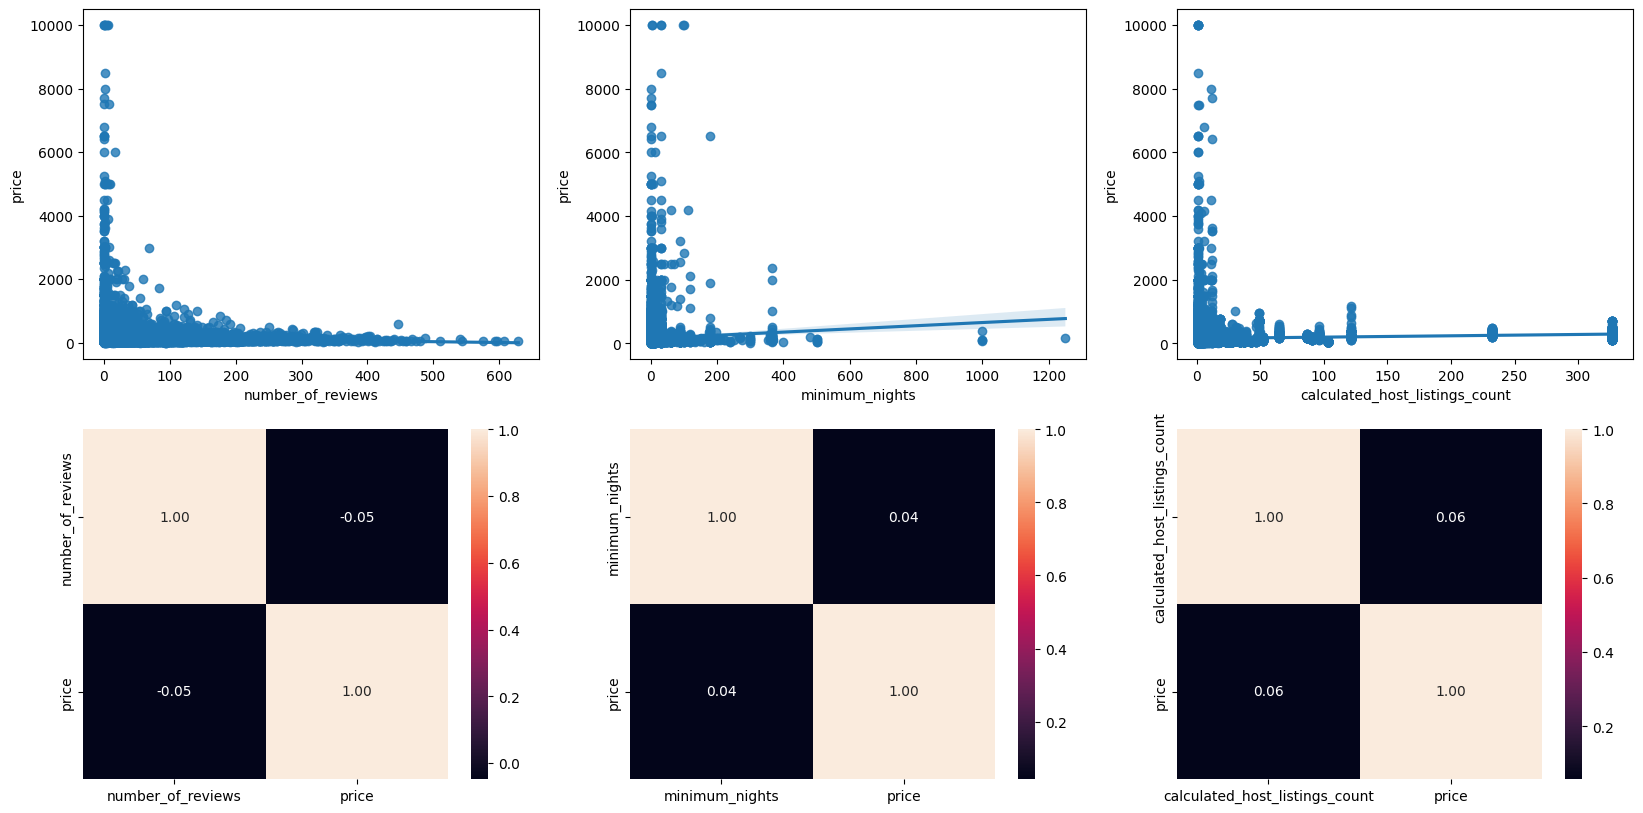

In [7]:
#Análisis de variables multivariante
#Análisis numérico-numérico
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(20,10))

#Precio y Número de reseñas
sns.regplot(ax= axis[0,0], data=airbnb_ny, x= "number_of_reviews", y="price")
sns.heatmap(airbnb_ny[["number_of_reviews", "price"]].corr(), annot=True, fmt=".2f", ax=axis[1,0])

#Precio y número mínimo de noches
sns.regplot(ax= axis[0,1], data=airbnb_ny, x= "minimum_nights", y="price")
sns.heatmap(airbnb_ny[["minimum_nights", "price"]].corr(), annot=True, fmt=".2f", ax=axis[1,1])

#Precio y número propiedades activas por propietario
sns.regplot(ax= axis[0,2], data=airbnb_ny, x= "calculated_host_listings_count", y="price")
sns.heatmap(airbnb_ny[["calculated_host_listings_count", "price"]].corr(), annot=True, fmt=".2f", ax=axis[1,2])




plt.show()

En las anteriores gráficas vemos lo siguiente:

- Precio y número de reseñas: ambas tienen una correlación negativa. Cuanto mayor es el precio del airbnb menor es el número de reseñas que tiene. Esto se puede deber a que cuanto más barato sea un piso más inseguridad sobre el mismo pueden tener las personas, por lo que se tiende a dejar una reseña. Cuanto más caro más se asume que el airbnb es de buena calidad.
    De todas formas esta correlación es muy leve por lo que prácticamente estas dos variables no están correlacionadas.

- Precio y número de noches mínimo: Por el contrario, estas dos variables tienen una correlación positiva. Cuanto mayor sea el precio suelen pedir un mayor número de noches como mínimo para la estancia. Un motivo podría ser que al tener el piso un precio elevado se exige una mayor estancia, y cuanto peor calidad tenga el mismo, este requisito se reduce. Nuevamente ambas varibles tienen muy poca correlación entre sí.

- Precio y número propiedades activas por propietario: Nuevamente la correlación es positiva pero muy poco significante. Cuanto mayor sea el precio del airbnb es más probable que los propietarios tengan un mayor número de viviendas. Puede deberse a que aquellas viviendas más caras son así porque los propietarios disponen de una mayor cantidad de dinero, por lo que tienen mayor acceso a poseer más viviendas.

<Axes: xlabel='neighbourhood_group', ylabel='count'>

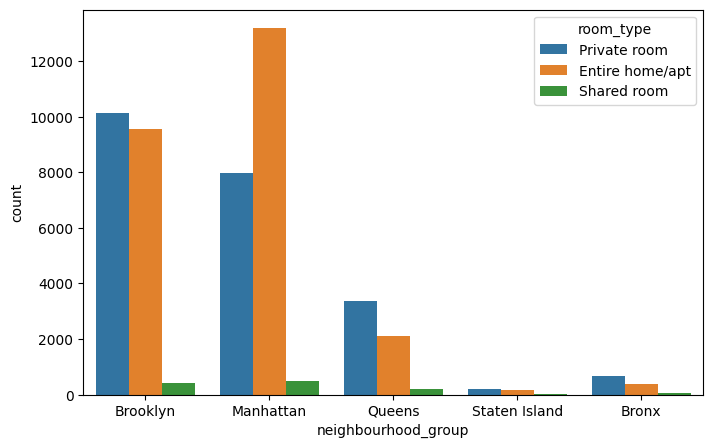

In [8]:
#Análisis categórico-categórico
fig, axis = plt.subplots(1, 1, figsize=(8,5))

#Relaciones: Distrito-Propietarios, Distrito-Tipos de apartamentos, Propietarios_Tipo de apartamentos

#Distrito-Propietarios
sns.countplot(data=airbnb_ny, x="neighbourhood_group", hue="room_type")



En general las habitaciones compartidas son significativamente minoría en cualquier distrito de la ciudad. Y solamente en Manhattan hay más casas que se alquilan completamente que habitaciones privadaas y encima con mucha diferencia. Generalmente la diferencia, aunque contraria, no es tan grande entre las habitaciones privadas y las casas completas

Mientras que Brooklyn y Manhattan tienen bastantes pisos de airbnb (la mayoría), el resto de distritos tienen significativamente menos pisos. Sobre todo Staten Islan y el Bronx. Esto se puede deber a que son distritos menos atractivos para el turismo comparado con Brooklyn y Manhattan.

<Axes: >

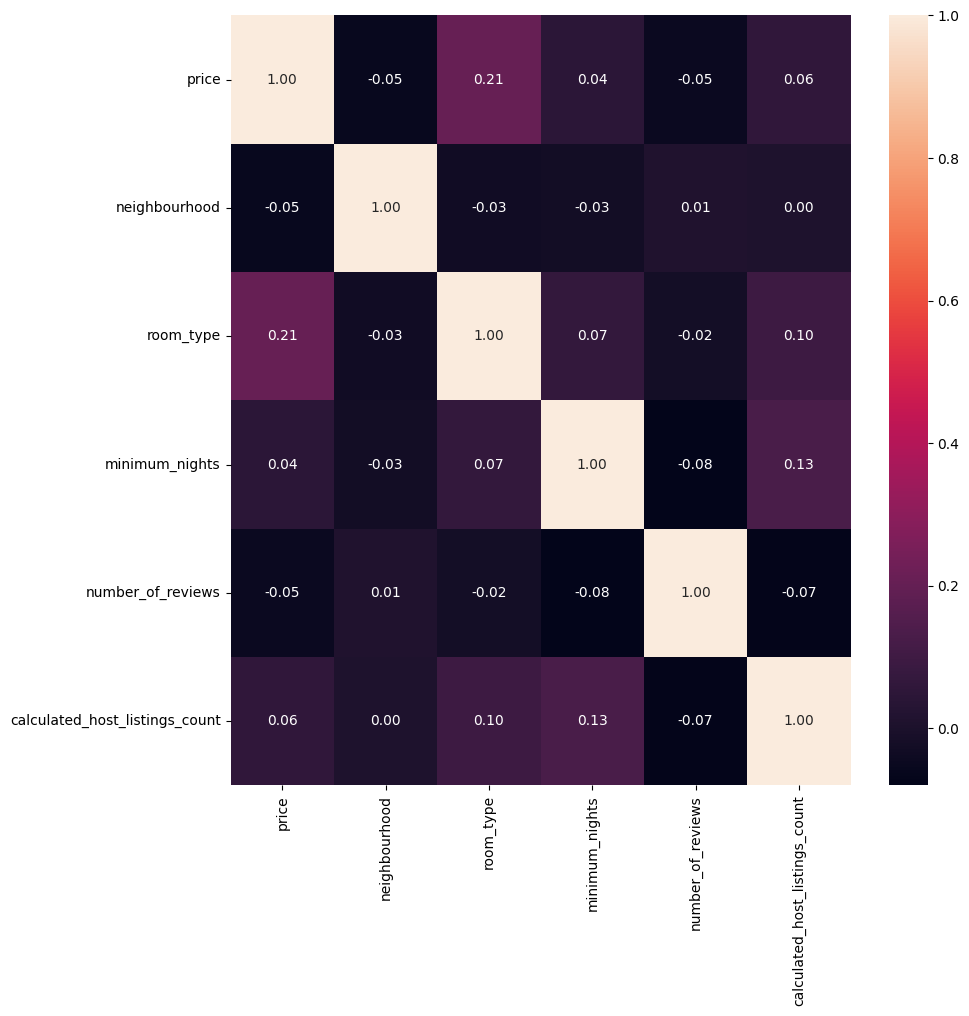

In [9]:
#Análisis numérico-categrico
airbnb_ny["room_type"]=pd.factorize(airbnb_ny["room_type"])[0]
airbnb_ny["neighbourhood"]=pd.factorize(airbnb_ny["neighbourhood"])[0]

fig, axis = plt.subplots(figsize=(10,10))
sns.heatmap(airbnb_ny[["price", "neighbourhood", "room_type", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f")


En general las variables no tienen mucha correlación entre sí. La mayor correlación de la base de datos existe entre el precio y el tipo de habitación. Cuanto más comoda sea la casa del airbnb, más cara va a ser. De todas formas, como existen otras variables que influyen en el precio (el distrito, el tamaño, los negocios próximos, etc.) no llega a ser del todo muy relevante.

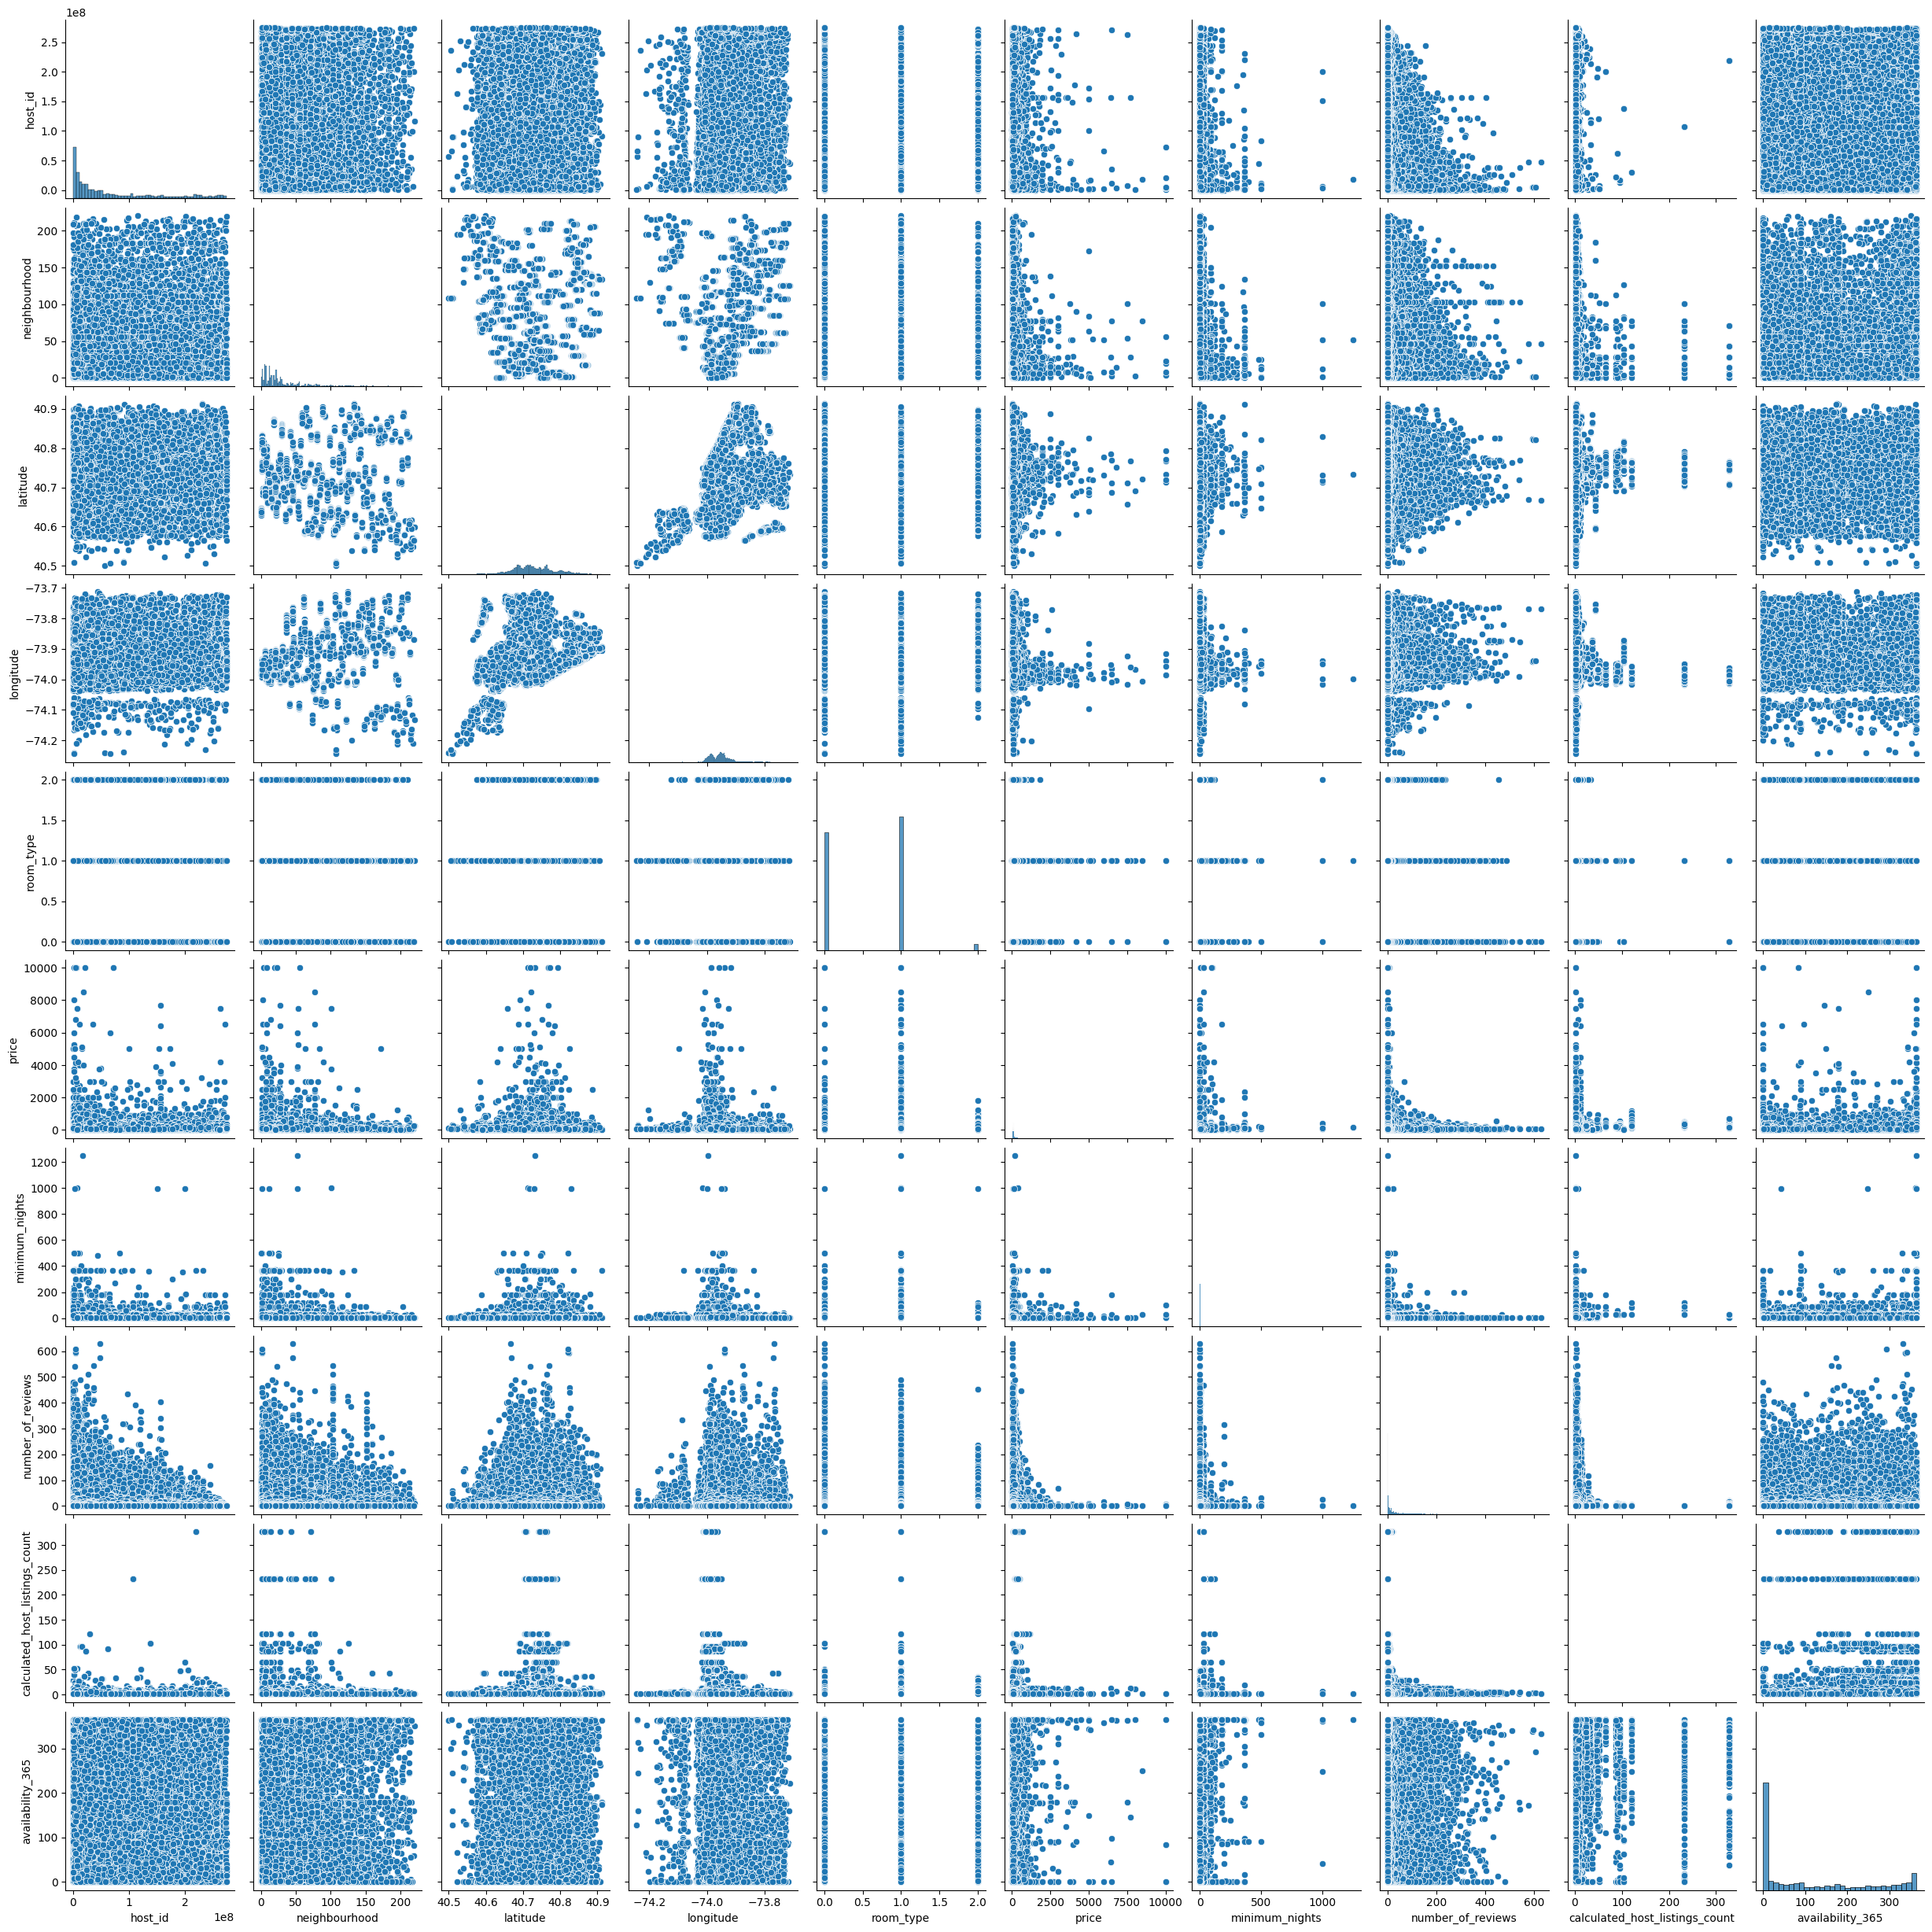

In [10]:
#Dibujamos el pairplot
sns.pairplot(data = airbnb_ny)

In [11]:
#Paso : Ingeniería de características

#Análisis de outliers
airbnb_ny.describe()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


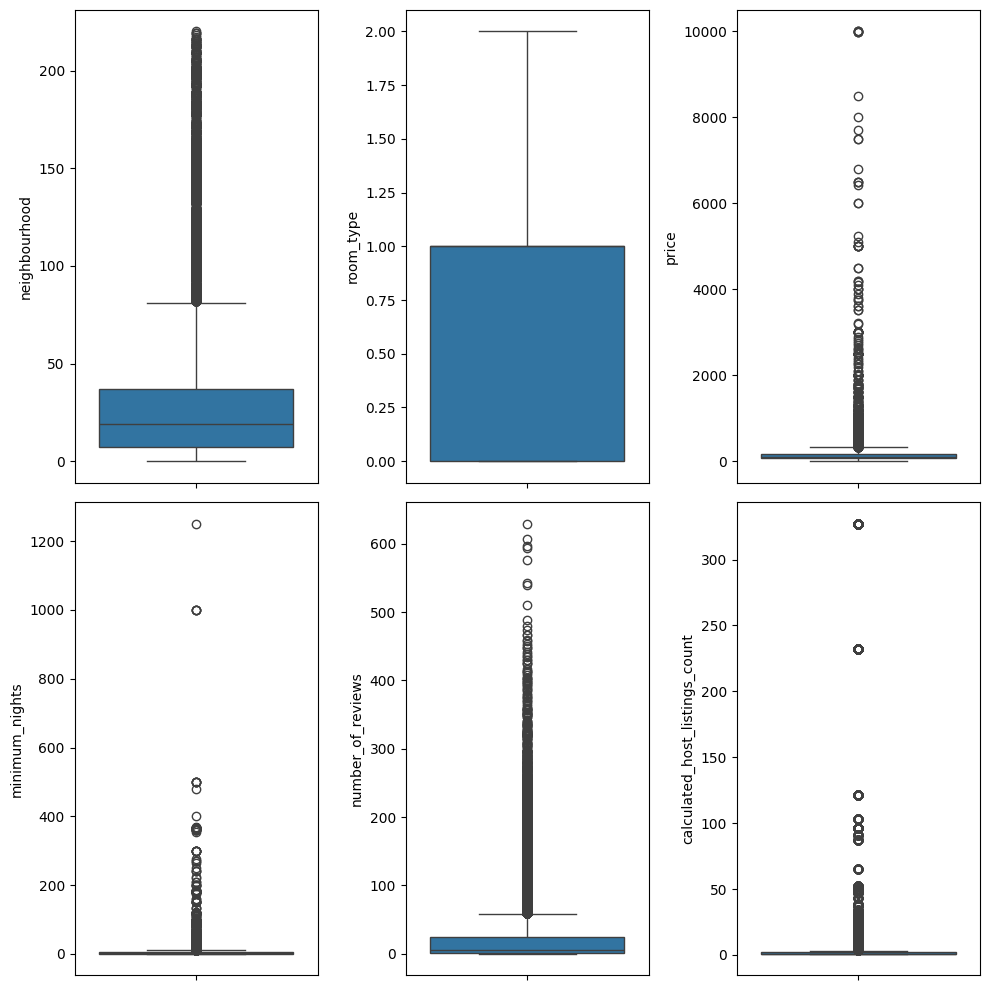

In [12]:
fig, axis = plt.subplots(2,3, figsize=(10,10))

sns.boxplot(ax=axis[0,0], data=airbnb_ny["neighbourhood"])
sns.boxplot(ax=axis[0,1], data=airbnb_ny["room_type"])
sns.boxplot(ax=axis[0,2], data=airbnb_ny["price"])
sns.boxplot(ax=axis[1,0], data=airbnb_ny["minimum_nights"])
sns.boxplot(ax=axis[1,1], data=airbnb_ny["number_of_reviews"])
sns.boxplot(ax=axis[1,2], data=airbnb_ny["calculated_host_listings_count"])

plt.tight_layout()
plt.show()

Existen muchos outliers dentro de las variables de: "calculated_host_listings_count", "number_of_reviews", "minimum_nights", "price" y "neighbourhood".
Realizaremos la detección de valores atípicos de todas las variables menos de neighbourhood ya que es una variable cualitativa, mientras que el resto son variables cuantitativas.

In [13]:
#Detección de valores atípicos: calculated_host_listings_count

listcount_stats = airbnb_ny["calculated_host_listings_count"].describe()
listcount_stats

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [14]:
listcount_iqr = listcount_stats["75%"] - listcount_stats["25%"]
upper_limit = listcount_stats["75%"] + 1.5 * listcount_iqr
lower_limit = listcount_stats["25%"] - 1.5 * listcount_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(listcount_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [15]:
#Limpieza de outliers
airbnb_ny = airbnb_ny[airbnb_ny["calculated_host_listings_count"]>4]

In [16]:
#Detección de valores atípicos: number_of_reviews

numrev_stats = airbnb_ny["number_of_reviews"].describe()
numrev_stats

count    5641.000000
mean       16.339302
std        38.768468
min         0.000000
25%         0.000000
50%         3.000000
75%        13.000000
max       543.000000
Name: number_of_reviews, dtype: float64

In [17]:
numrev_iqr = numrev_stats["75%"] - numrev_stats["25%"]
upper_limit = numrev_stats["75%"] + 1.5 * numrev_iqr
lower_limit = numrev_stats["25%"] - 1.5 * numrev_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(numrev_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 32.5 y -19.5, con un rango intercuartílico de 13.0


In [18]:
airbnb_ny = airbnb_ny[airbnb_ny["number_of_reviews"]>35]

In [19]:
#Detección de valores atípicos: minimum_nights

minight_stats = airbnb_ny["minimum_nights"].describe()
minight_stats

count    700.000000
mean       3.925714
std       10.094556
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      120.000000
Name: minimum_nights, dtype: float64

In [20]:
minight_iqr = minight_stats["75%"] - minight_stats["25%"]
upper_limit = minight_stats["75%"] + 1.5 * minight_iqr
lower_limit = minight_stats["25%"] - 1.5 * minight_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(minight_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [21]:
airbnb_ny = airbnb_ny[airbnb_ny["minimum_nights"]>4]

In [22]:
#Detección de valores atípicos: price

price_stats = airbnb_ny["price"].describe()
price_stats

count      90.000000
mean      122.455556
std       229.672417
min        32.000000
25%        55.750000
50%        75.000000
75%       103.750000
max      2000.000000
Name: price, dtype: float64

In [23]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 175.75 y -16.25, con un rango intercuartílico de 48.0


In [24]:
airbnb_ny = airbnb_ny[airbnb_ny["price"]>0]

In [25]:
#Detección de valores atípicos: neighbourhood

neighbourhood_stats = airbnb_ny["neighbourhood"].describe()
neighbourhood_stats

count     90.000000
mean      37.911111
std       41.498516
min        0.000000
25%        8.000000
50%       19.000000
75%       52.750000
max      183.000000
Name: neighbourhood, dtype: float64

In [26]:
neighbourhood_iqr = neighbourhood_stats["75%"] - neighbourhood_stats["25%"]
upper_limit = neighbourhood_stats["75%"] + 1.5 * neighbourhood_iqr
lower_limit = neighbourhood_stats["25%"] - 1.5 * neighbourhood_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 119.88 y -59.12, con un rango intercuartílico de 48.0


In [27]:
airbnb_ny = airbnb_ny[airbnb_ny["neighbourhood"]>0]

In [28]:
#Análisis de valor faltante
airbnb_ny.isnull().sum()
#No existen valores nulos en la base de datos ya más filtrada

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [29]:
#Escalado de funciones
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "neighbourhood", "room_type"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(airbnb_ny[num_variables])
df_scal = pd.DataFrame(scal_features, index = airbnb_ny.index, columns = num_variables)
df_scal["price"] = airbnb_ny["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,neighbourhood,room_type,price
201,0.015748,0.017391,0.000000,0.248619,0.5,265
325,0.314961,0.078261,0.047619,0.055249,0.0,120
729,0.000000,0.217391,0.000000,0.033149,0.5,109
835,0.377953,0.200000,0.047619,0.055249,0.0,135
1121,0.165354,0.217391,0.047619,0.093923,0.5,89


In [36]:
#Selección de funciones

X = df_scal.drop("price", axis = 1)[num_variables]
Y = df_scal["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, Y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,neighbourhood,room_type
0,0.217391,0.000000,0.116022,0.5
1,0.000000,0.047619,0.022099,0.0
2,0.217391,0.285714,0.082873,0.0
3,0.739130,0.000000,0.381215,0.0
4,0.000000,0.000000,0.071823,0.0
